### Obdelava besedila

In [21]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> book
       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package brown to /root/nltk_data...
       |   Package brown is already up-to-date!
       | Downloading package chat80 to /root/nltk_data...
       |   Package chat80 is already up-to-date!
       | Downloading package cmudict to /root/nltk_data...
       |   Package cmudict is already up-to-date!
       | Downloading package conll2000 to /root/nltk_data...
       |   Package conll2000 is already up-to-date!
       | Downloading package conll2002 to /root/nltk_data...
       |   Package conll2002 is already up-to-date!
       | Downloading packa

True

In [22]:
import pandas as pd

df = pd.read_csv('drive/My Drive/FERI/MAG/TRIR/Data/worldbook.csv', sep=',', decimal='.', index_col='Country', usecols=['Country', 'Continent', 'Background'])
df.shape

(229, 2)

Predprocesiranje

In [0]:
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer

def preprocess_text(text):
  stemmer = PorterStemmer()

  tokens = word_tokenize(text)
  stop_list = stopwords.words('english') + list(string.punctuation)
  tokens_without_stop = [token for token in tokens if token not in stop_list]
  tokens_stemm = [stemmer.stem(t) for t in tokens_without_stop]

  return ' '.join(tokens_stemm)

Tokenizacija

In [0]:
from nltk import word_tokenize
from nltk import FreqDist
from nltk import ngrams

def showNGrams(text, top, ngram):
  tokens = word_tokenize(text.lower())
  tokens_freq = FreqDist(ngrams(tokens, ngram))
  for token, freq, in tokens_freq.most_common(top):
    print("{t:<25}{f}".format(t=str(token), f=freq))

  tokens_freq.plot(top, cumulative=False)

Slovenija unigrami in bigrami

In [0]:
text = df['Background'].loc[df.index == 'Slovenia'][0]
text = preprocess_text(text)

('sloven',)              3
('war',)                 3
('slovenia',)            3
("'s",)                  2
('world',)               2
('join',)                2
('serb',)                2
('yugoslavia',)          2
('zone',)                2
('the',)                 1


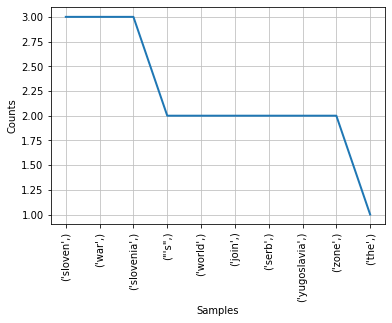

('world', 'war')         2
('the', 'sloven')        1
('sloven', 'land')       1
('land', 'part')         1
('part', 'austro-hungarian')1
('austro-hungarian', 'empir')1
('empir', 'latter')      1
('latter', "'s")         1
("'s", 'dissolut')       1
('dissolut', 'end')      1


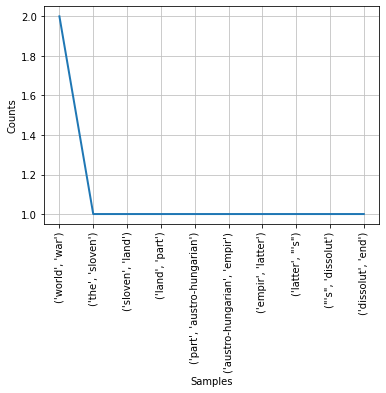

In [26]:
showNGrams(text, 10, 1)
showNGrams(text, 10, 2)

Kuba unigrami in bigrami

In [0]:
text = df['Background'].loc[df.index == 'Cuba'][0]
text = preprocess_text(text)

('us',)                  10
('cuban',)               8
('cuba',)                7
('the',)                 4
('rule',)                4
('nation',)              4
('follow',)              3
('spanish',)             3
('sever',)               3
('independ',)            3


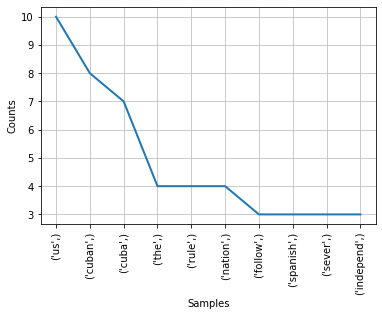

('us', 'cuba')           3
('cuban', 'nation')      3
('spanish', 'rule')      2
('raul', 'castro')       2
('land', 'border')       2
('fy', '2018')           2
('the', 'nativ')         1
('nativ', 'amerindian')  1
('amerindian', 'popul')  1
('popul', 'cuba')        1


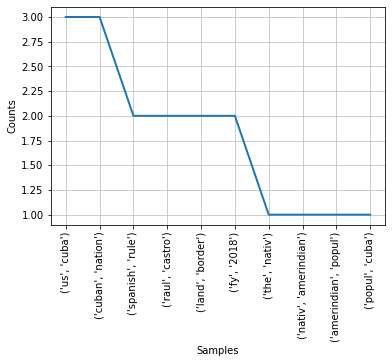

In [28]:
showNGrams(text, 10, 1)
showNGrams(text, 10, 2)

Urejanje kontinentov

In [29]:
df['Continent'].unique()

array(['Asia', 'Middle East', 'Central America and the Caribbean',
       'Oceania', 'Europe', 'South America', 'Africa', 'Southeast Asia',
       'North America', 'AsiaEurope', nan, 'Arctic Region'], dtype=object)

In [30]:
df['Continent'].isna().sum()

3

In [31]:
df.loc[df['Continent'].isnull()]

,Continent,Background
Country,,
Sint Maarten,NaN,Although sighted by Christopher COLUMBUS in 14...
France,NaN,France today is one of the most modern countri...
Curacao,NaN,The original Arawak Indian settlers who arrive...


In [0]:
df.loc[df.index == 'Sint Maarten', 'Continent'] = 'Central America and the Caribbean'
df.loc[df.index == 'France', 'Continent'] = 'Europe'
df.loc[df.index == 'Curacao', 'Continent'] = 'South America'

In [33]:
df.loc[df['Continent'] == 'AsiaEurope']

,Continent,Background
Country,,
Ukraine,AsiaEurope,Ukraine was the center of the first eastern Sl...


In [0]:
df.loc[df['Continent'].isin(['Middle East', 'Southeast Asia']), 'Continent'] = 'Asia'
df.loc[df['Continent'] == 'AsiaEurope', 'Continent'] = 'Europe'
df.loc[df['Continent'].isin(['North America', 'Central America and the Caribbean']), 'Continent'] = 'North America'
df.loc[df['Continent'] == 'Oceania', 'Continent'] = 'Australia'

In [35]:
df['Continent'].unique()

array(['Asia', 'North America', 'Australia', 'Europe', 'South America',
       'Africa', 'Arctic Region'], dtype=object)

In [36]:
continents = {}
conts = df['Continent'].unique()
for index, item in enumerate(conts):
  continents[conts[index]] = ' '.join(df['Background'].loc[df['Continent'] == item])

print(continents)

{'Asia': 'Ahmad Shah DURRANI unified the Pashtun tribes and founded Afghanistan in 1747. The country served as a buffer between the British and Russian Empires until it won independence from notional British control in 1919. A brief experiment in increased democracy ended in a 1973 coup and a 1978 communist countercoup. The Soviet Union invaded in 1979 to support the tottering Afghan communist regime, touching off a long and destructive war. The USSR withdrew in 1989 under relentless pressure by internationally supported anti-communist mujahidin rebels. A series of subsequent civil wars saw Kabul finally fall in 1996 to the Taliban, a hardline Pakistani-sponsored movement that emerged in 1994 to end the country\'s civil war and anarchy. Following the 11 September 2001 terrorist attacks, a US, Allied, and anti-Taliban Northern Alliance military action toppled the Taliban for sheltering Usama BIN LADIN. A UN-sponsored Bonn Conference in 2001 established a process for political reconstruc

In [37]:
df_continents = pd.DataFrame(continents.items(), columns=['Continent', 'Background'])
df_continents.set_index('Continent', inplace=True)
df_continents.head(7)

,Background
Continent,
Asia,Ahmad Shah DURRANI unified the Pashtun tribes ...
North America,Lucayan Indians inhabited the islands when Chr...
Australia,Prehistoric settlers arrived on the continent ...
Europe,Once the center of power for the large Austro-...
South America,"In 1816, the United Provinces of the Rio Plata..."
Africa,Multiple waves of Bantu-speaking groups moved ...
Arctic Region,Settled by Norwegian and Celtic (Scottish and ...


Unigrami in bigrami po kontinentih

ASIA 

('the',)                 1255
(',',)                   994
('in',)                  815
('and',)                 687
('.',)                   584
('of',)                  563
('a',)                   369
('to',)                  361
('by',)                  151
("'s",)                  139


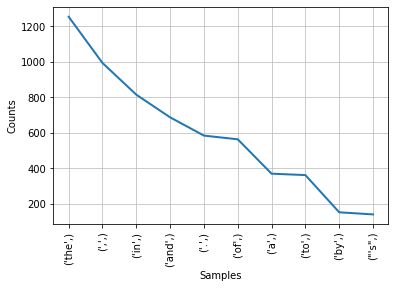

('in', 'the')            154
(',', 'and')             151
('of', 'the')            134
('.', 'the')             114
('.', 'in')              111
(',', 'the')             101
('the', 'country')       67
('to', 'the')            55
('and', 'the')           49
('by', 'the')            42


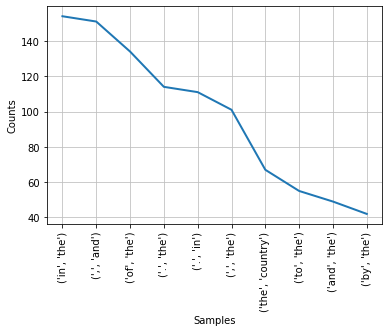

NORTH AMERICA 

('the',)                 455
(',',)                   269
('in',)                  229
('and',)                 180
('of',)                  176
('.',)                   176
('to',)                  94
('a',)                   90
('was',)                 67
('by',)                  63


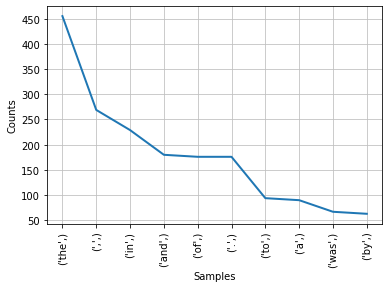

('of', 'the')            70
('the', 'island')        43
('in', 'the')            42
('.', 'the')             38
(',', 'and')             36
(',', 'the')             30
('to', 'the')            28
('.', 'in')              26
('the', 'us')            23
('by', 'the')            22


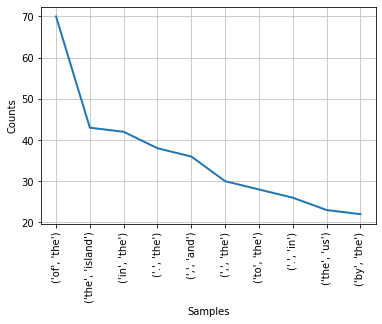

AUSTRALIA 

('the',)                 211
('in',)                  140
(',',)                   97
('of',)                  91
('.',)                   84
('and',)                 76
('a',)                   60
('to',)                  50
('islands',)             35
('was',)                 25


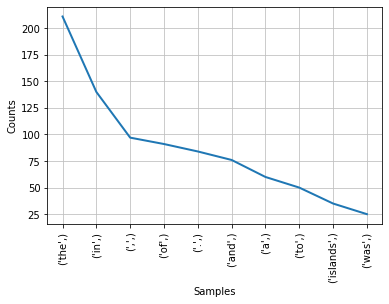

('of', 'the')            30
('in', 'the')            27
('.', 'the')             27
(',', 'and')             15
(',', 'the')             13
('new', 'zealand')       11
('the', 'us')            11
('with', 'the')          10
('by', 'the')            10
('the', 'islands')       10


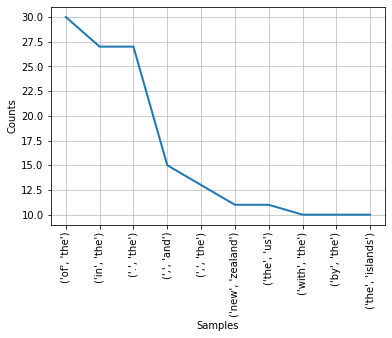

EUROPE 

('the',)                 724
(',',)                   470
('in',)                  384
('and',)                 368
('of',)                  344
('.',)                   306
('a',)                   226
('to',)                  159
('by',)                  72
('its',)                 69


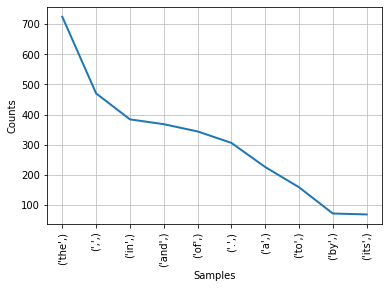

('of', 'the')            112
(',', 'and')             72
('and', 'the')           64
(',', 'the')             62
('.', 'the')             61
('in', 'the')            45
('.', 'in')              44
('the', 'eu')            42
('world', 'war')         34
('the', 'country')       31


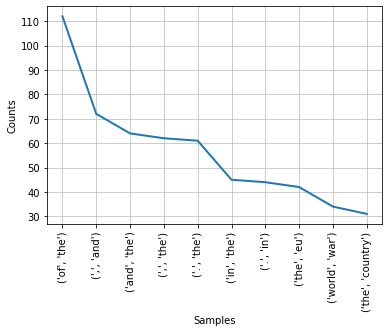

SOUTH AMERICA 

('the',)                 195
(',',)                   154
('in',)                  116
('of',)                  110
('and',)                 95
('.',)                   86
('a',)                   64
('to',)                  57
('by',)                  42
('was',)                 34


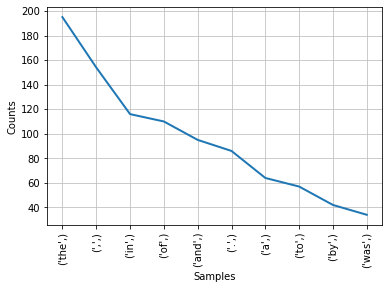

('of', 'the')            35
(',', 'and')             26
('in', 'the')            21
(',', 'the')             18
('.', 'the')             17
('by', 'the')            13
('.', 'in')              12
('the', 'country')       10
('and', 'the')           10
('with', 'the')          7


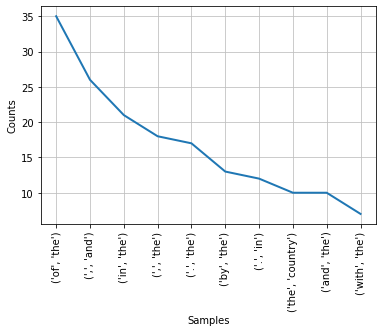

AFRICA 

('the',)                 962
('in',)                  752
(',',)                   743
('and',)                 521
('.',)                   478
('of',)                  436
('a',)                   391
('to',)                  290
('was',)                 160
('by',)                  127


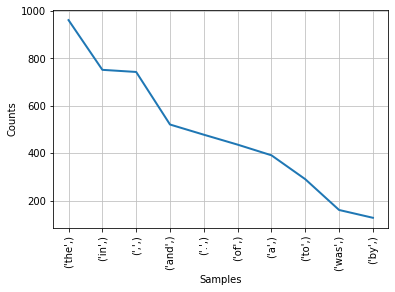

(',', 'and')             109
('of', 'the')            103
('in', 'the')            94
(',', 'the')             90
('.', 'the')             90
('.', 'in')              76
('the', 'country')       59
('to', 'the')            37
('and', 'the')           36
(',', 'but')             34


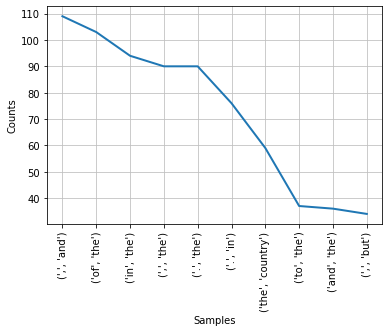

ARCTIC REGION 

('the',)                 30
(',',)                   18
('in',)                  15
('and',)                 13
('.',)                   11
('of',)                  8
('greenland',)           8
('by',)                  7
('iceland',)             4
("'s",)                  4


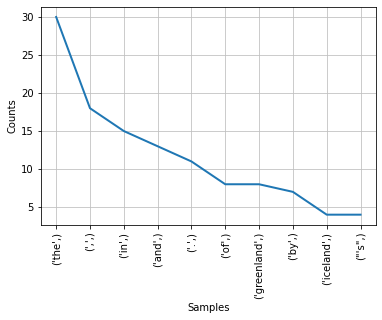

('of', 'the')            5
('.', 'greenland')       4
('by', 'the')            3
('in', 'the')            3
(',', 'and')             3
(',', 'iceland')         2
('the', 'world')         2
('world', "'s")          2
(',', 'the')             2
('iceland', 'was')       2


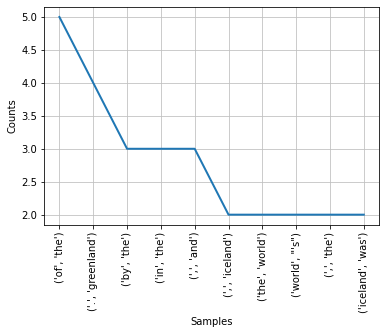

In [38]:
for index, row in df_continents.iterrows():
  print(index.upper(), '\n')
  text = row['Background']
  showNGrams(text, 10, 1)
  showNGrams(text, 10, 2)

Tfidf

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(lowercase=True, preprocessor=preprocess_text, ngram_range=(1,2))
vectors = vectorizer.fit_transform(df['Background'])
print(vectorizer.get_feature_names())

['000', '000 2010', '000 250', '000 As', '000 american', '000 civilian', '000 dead', '000 death', '000 doubl', '000 driven', '000 ethnic', '000 fatal', '000 fellow', '000 former', '000 injur', '000 intern', '000 live', '000 mi', '000 mostli', '000 oppon', '000 peopl', '000 refuge', '000 rohingya', '000 secur', '000 though', '000 troop', '000 year', '02', '02 led', '04', '04 sign', '05', '05 andr', '05 contribut', '09', '09 confluenc', '10', '10 EU', '10 countri', '10 day', '10 januari', '10 million', '10 time', '10 world', '10 year', '100', '100 000', '100 arm', '100 day', '100 member', '100 peopl', '100 year', '1000', '1000 larg', '1000 madagascar', '1000 mani', '1000 polonnaruwa', '1000 samoa', '1014', '1014 norman', '1070', '1070 1200', '10th', '10th 11th', '10th 13th', '10th centuri', '11', '11 2000', '11 decemb', '11 governor', '11 januari', '11 march', '11 million', '11 partli', '11 septemb', '11 southern', '11 upris', '11th', '11th 13th', '11th centuri', '12', '12 februari', '12

Klasifikacija

In [40]:
from sklearn.model_selection import train_test_split

f_train, f_test, l_train, l_test = train_test_split(vectors, df['Continent'], test_size=0.4, random_state=555)

print(f_train.shape, f_test.shape, l_train.shape, l_test.shape)

(137, 31796) (92, 31796) (137,) (92,)


In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score

mnb = MultinomialNB(alpha = 0.2)
mnb.fit(f_train, l_train)

prediction = mnb.predict(f_test)

acc_score = accuracy_score(l_test, prediction)
f1_score = f1_score(l_test, prediction, average='micro')

print(f'Accuracy score: {acc_score}')
print(f'F1 score: {f1_score}')

Accuracy score: 0.6739130434782609
F1 score: 0.6739130434782609
